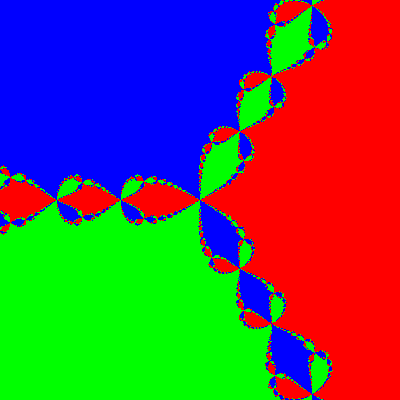

In [9]:
from PIL import Image
import math

lenx = 400 # width
leny = 400 # height

image = Image.new("RGB", (lenx, leny)) 


# square boundary
x1 = -2.0 
x2 = 2.0
y1 = -2.0
y2 = 2.0


# 3 cube roots of 1
z1 = 1
z2 = complex(-0.5, math.sin(2*math.pi/3))
z3 = complex(-0.5, -1*math.sin(2*math.pi/3))



it = 25 # max iterations 
h = 1e-6 # step size for diff
err = 1e-3  # precision  


# cube function
def f(z):
    return z**3 -1  

for y in range(leny):
    zy = y * (y2 - y1) / (leny - 1) + y1
    
    for x in range(lenx):
        zx = x * (x2 - x1) / (lenx - 1) + x1
        
        z = complex(zx, zy)
        
        for i in range(it): 
            
            dz = (f(z + complex(h, h)) - f(z)) / complex(h, h) # differential of cubic function
            
            z0 = z - f(z) / dz  # transformation
            
            
            if abs(z0 -z)< err: # error stop
                break

            z = z0
            
            
        # error values
        diff_r1 = abs(z-z1) 
        diff_r2 = abs(z-z2)
        diff_r3 = abs(z-z3)
        
        
        #taking min of three values and assigning colors to it
        
        diff_min = min(diff_r1,diff_r2,diff_r3) 
        
        if(diff_r1==diff_min):
            image.putpixel((x, y), (255,0,0))
            
        elif(diff_r2==diff_min):
            image.putpixel((x, y), (0,255,0))
            
        elif(diff_r3==diff_min):
            image.putpixel((x, y), (0,0,255))


# print           
image